# D208 - Data Modelling Performance Assessment Task 1
Aidan Soares, 012042436, Western Governors University

### A1: Research Question
For this assessment I will be using the Churn dataset provided. With said dataset I will be using multiple linear regression to identify "What independent variables affect customer tenure?". For organizations that rely on strong customer loyalty, tenure is a benchmark for assessing the current retention of clientele. Identifying the variables that correlate with longer tenures are significantly important for a telecommunications company as it grants the company insights on the service offerings, user demographics, and customer needs that are most strongly associated with customer satisfaction. Once known, telecomm companies can seek to maintain the aspects of the service offerings that are most effective in customer retention, ultimately preventing losses in market capitalization and shrinking revenue streams. Having an understanding of these variables can result in cost savings too, as bolstering strong customer appeal results in natural expansion through reviews and prevents the company from having to constantly develop costly advertising campaigns.

### A2: Goals
My goals are to select a net of independant variables (both continuous and categorical) and utilize multiple linear regression to identify which varibles are correlated with long customer tenures, the dependant variable. After undergoing feature selection procedures to isolate the most relevant independant variables for my model, I will ideally be able to recognize the likelihood of a customer churning based on said factors. Doing so presents the metrics in which the company can recognize and assist the customers that may feel undersupported or those that need additional service, demonstrating proactivity in ensuring strong customer relationships and satisfaction.

### B1: Assumptions
The 4 assumptions of multiple linear regression for my assessment:
- Linear relationships must exist between the independant variables selected and the dependant variable. As such, in the determination of which variables demonstrate an influence on my dependant variable, I would be able to plot these two variables against each other and notice that a change in the idependent variable results in a linear positive or negative change in the dependant variable. This will also aid in the reduction of irrelevant variables in my analysis as variables that demonstrate no relationship with my dependant variable will be excluded from my analysis.
- Independant variables cannot have significant correlation with each other. This is known as multicollinearity and it would introduce less reliable statistical results as the independant variables would not be able to changed without influencing one another, leading to incorrect inferences to be drawn from the relationship between the independant variabales and the dependant variable.
- My analysis assumes that the residuals (the difference between the datapoint and the regression line) must be normally distributed.
- The final assumption is homoscedasticity; the residuals (the difference between the datapoint and the regression line) should be relatively consistent. If these residuals were to scatter unequally, the resulting statistical results from the analysis would not be reliable.

### B2: Benefits of Python
For this assessment I am opting to use python to conduct my analysis for two main reasons:
- It is a relatively simple programming language to utilize for larger scale data processing. This allows me to clean and manipulate the significant amount of data provided within the csv file at scale, granting me the ability to quickly remove errors, null values and duplicates from the dataset. I can then conduct my analysis much more efficiently.
- Python has access to a wide variety of libraries that are perfectly suited to conducting the statistical analysis needed to answer my research question. Pandas has tools to build and manipulate dataframes, scipy is great for performing calculations for statistical significance that can ensure reliability in the multiple linear regression model, and I will also be utilizing libraries such as seaborn and matplotlib to build visual representations of data relationships between independant variables and the dependant variable.

### B3: Justification for MLR
Multiple Linear Regression (MLR) is a modelling technique utilized to model and estimate the impact that many independant variables may have on a single dependant variable. For this assessment, I am trying to determine which of my independant variables impact the length of customer tenure, reducing the model by rejecting variables that do not demonstrate statistical significance on changes in tenure. As the length of tenure is a continuous variable, MLR is the perfect technique for identifying the factors that significantly impact my target rather than logistic regression, which is only applicable when the dependant variable is categorical. Furthermore MLR can be utilized to make predictions about the outcome of customer tenure based on the statistically significant independant variables isolated, helping to predict churn rates for better service provision, ad campaigns, and business stability.

In [37]:
#importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing

#importing dataset into a dataframe
df = pd.read_csv('churn_clean.csv', index_col=0)

### C1: Data Cleaning

First and foremost I want to assess the current quality of the churn data imported from the csv. To do so, I will utilize the .info() function on my dataframe to grab a high-level overview of the data each column houses. Should there be any null values present within the dataset, imputation will be required. I will also do a cursory check on the total number of .duplicated() results within my dataframe, as duplicates will need to be removed immediately. In the performance assessment for D206 I identified that the continuous variables provided within the dataset present outliers, however in said assessment I reasoned that the outliers still present genuine relevant data for analysis. As an example, income levels above $100,000 are identified as outliers via boxplot visualization, but this information is relevant for my analysis as higher income levels could dictate a stronger willingness to maintain tenure with a telecomm service. As such, I will not be removing outliers for this assessment.

Once those preliminary checks are done I want to rename the titles of the columns 'Item 1-8' to make them more readable from a glance as they currently do not denote any meaning. Even if these variables end up not being used in my linear regression model, changing them to a more comprehensive format will make future analysis for myself and other analysis easier to understand. 

I will then be re-expressing the nominal categorical data for variables selected as ordinal data or through one hot encoding for more effective analysis. Details to follow in section C3 and C4.

In [38]:
# Generating overview of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

As there are no null values, no imputation will be performed.

In [39]:
df.duplicated().value_counts()

False    10000
dtype: int64

No duplicate values exist within the dataset so nothing needs to be dropped.

In [40]:
#Changing the names of item1-8 columns for better clarity based on the data dictionary
itemnames = {"Item1" : "timely_responses",
             "Item2" : "timely_fixes",
             "Item3" : "timely_replacements",
             "Item4" : "reliability",
             "Item5" : "options",
             "Item6" : "respectful_response",
             "Item7" : "courteous_exchange",
             "Item8" : "evidence_of_active_listening"}

df.rename(columns=itemnames, inplace=True)

#ensuring the changes have occurred
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,timely_responses,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,evidence_of_active_listening
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5


### C2: Summary Statistics
The dependant variable (Tenure), and independent variables I have selected for my multiple linear regression model are as follows, joined by their respective statistical summaries:
Additional summary of observations will be provided at the bottom.

**Tenure (in Months)**

In [41]:
df.Tenure.describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

**Children**

In [42]:
df.Children.value_counts().sort_index()

0     2570
1     2472
2     1495
3     1472
4     1006
5      212
6      187
7      185
8      210
9       92
10      99
Name: Children, dtype: int64

**Age**

In [43]:
df.Age.describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

**Income**

In [44]:
df.Income.describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

**Gender**

In [45]:
df.Gender.value_counts()

Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64

**Outage Time in Seconds Per Week**

In [46]:
df.Outage_sec_perweek.describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

**Number of Emails Sent by Company**

In [47]:
df.Email.describe()

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64

**Contract Type**

In [48]:
df.Contract.value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

**Internet Service Type**

In [49]:
df.InternetService.value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

**Tech Support**

In [50]:
df.TechSupport.value_counts()

No     6250
Yes    3750
Name: TechSupport, dtype: int64

**Monthly Charge**

In [51]:
df.MonthlyCharge.describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

**Bandwidth**

In [52]:
df.Bandwidth_GB_Year.describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

**Summary**
- Tenure: On average, customers remain with the telecom service provider for 34.5 months, at minimum a customer remained with the company for 1 month, and the longest customer tenure has been 72 months.
- Children: Customers typically have less than 4 children, as the quantities above 4 drop off dramatically
- Age: The lower limit of age is limited to those above the age of 18, with the average customer age being 53 years old. The oldest customer is 89 years old.
- Income: across the 10000 counts of data present from this column, the average income is approximately \\$39,807. While multiple income values sit above an income level of \\$100,000, these present legitimate data for analysis and should not be removed.
- Gender: this column presents a fairly even distribution between male and female, with a small subset of customers being non-binary.
- Outage: Average time that a customer experiences outage in connectivity in seconds per week is about 10 seconds.
- Emails: On average, customers can expect to receive 12 emails from the company, all customers have at minimum received 1 email, the max being 23.
- Contract Type: Over half of customers subscribe to their telecom plans on a month-to-month basis. The second most popular subscription model being two year plans, followed by one year plans.
- Internet Service Type: Fiber optic is the most popular internet service type available, followed by DSL, with the least popular selection being no internet service.
- Tech Support: Over 60% of customers have not opted to buy tech support for their service plans.
- Monthly Charge: On average, customers are charged $172.6 per month for their service plans, with the cheapest plan being just below \\$80 and the highest being \\$290.
- Bandwidth Use Per Year: On average, cusomters use 3392 GB per year, with the highest amount used in a year being 7159, and the lowest being 155.5.

### C3: Visualization

Overview of distribution for Tenure

Text(0, 0.5, 'Customers')

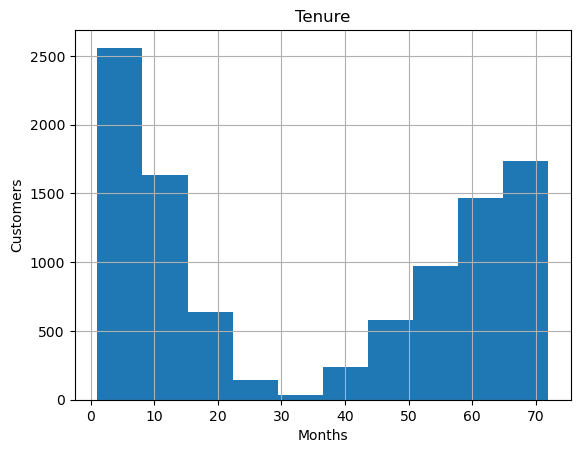

In [53]:
#Plotting the Tenure column as a histogram
df.hist(column=["Tenure"])
plt.xlabel("Months")
plt.ylabel("Customers")

<Axes: title={'center': 'Number of Children by Tenure'}, xlabel='Children', ylabel='Tenure'>

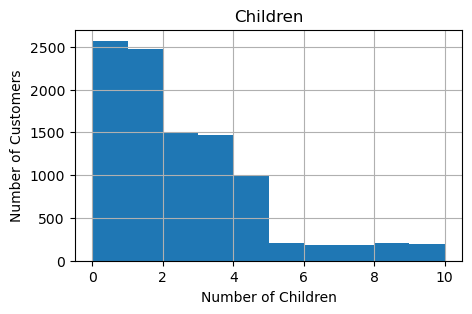

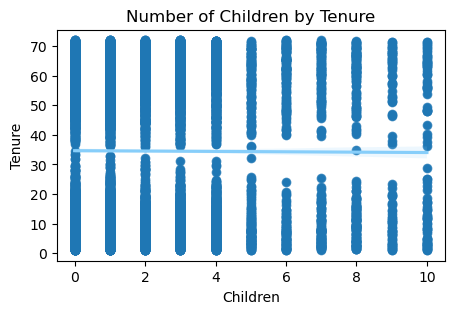

In [54]:
#Plotting the univarite distribution of Number of Children and then plotting the bivariate distribution against Tenure
df.hist(column=["Children"], figsize=(5,3))
plt.xlabel("Number of Children")
plt.ylabel("Number of Customers")

df.plot.scatter(x="Children",y="Tenure",title="Number of Children by Tenure", figsize=(5,3))
sns.regplot(data=df, x="Children", y="Tenure", scatter_kws={"color": "tab:blue"}, line_kws={"color": "lightskyblue"})

<Axes: title={'center': 'Customer Age by Tenure'}, xlabel='Age', ylabel='Tenure'>

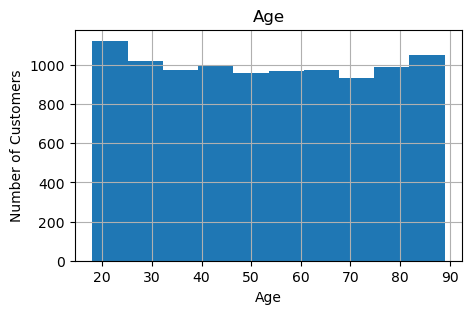

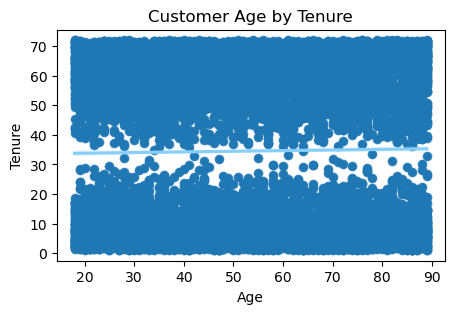

In [55]:
#Plotting the univarite distribution of Customer Age and then plotting the bivariate distribution against Tenure
df.hist(column=["Age"], figsize=(5,3))
plt.xlabel("Age")
plt.ylabel("Number of Customers")

df.plot.scatter(x="Age",y="Tenure",title="Customer Age by Tenure", figsize=(5,3))
sns.regplot(data=df, x="Age", y="Tenure", scatter_kws={"color": "tab:blue"}, line_kws={"color": "lightskyblue"})

<Axes: title={'center': 'Customer Income by Tenure'}, xlabel='Income', ylabel='Tenure'>

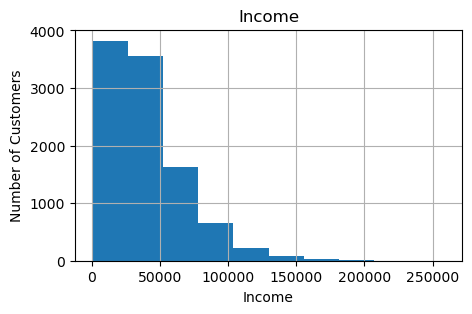

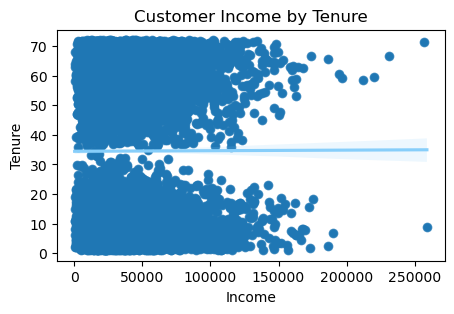

In [56]:
#Plotting the univarite distribution of Income and then plotting the bivariate distribution against Tenure
df.hist(column=["Income"], figsize=(5,3))
plt.xlabel("Income")
plt.ylabel("Number of Customers")

df.plot.scatter(x="Income",y="Tenure",title="Customer Income by Tenure", figsize=(5,3))
sns.regplot(data=df, x="Income", y="Tenure", scatter_kws={"color": "tab:blue"}, line_kws={"color": "lightskyblue"})

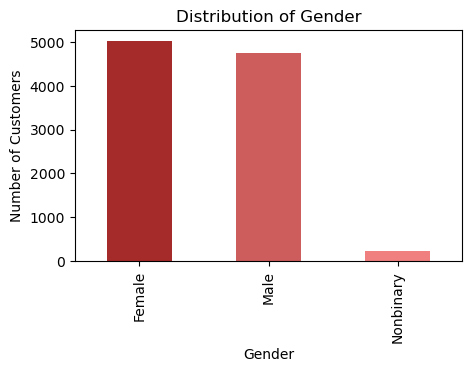

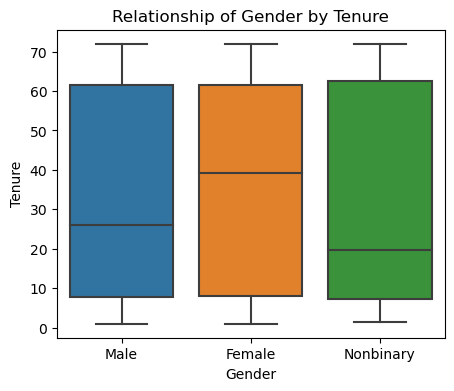

In [57]:
#Plotting the univarite distribution of Gender and then plotting the bivariate distribution against Tenure
df["Gender"].value_counts().plot(
    kind="bar", title="Distribution of Gender", ylabel="Number of Customers",xlabel="Gender", figsize=(5,3), color=['brown','indianred','lightcoral'])
plt.show()

plt.figure(figsize=(5,4))
sns.boxplot(data=df, x="Gender", y="Tenure")
plt.xlabel("Gender")
plt.ylabel("Tenure")
plt.title("Relationship of Gender by Tenure")
plt.show()

<Axes: title={'center': 'Outage by Tenure'}, xlabel='Outage_sec_perweek', ylabel='Tenure'>

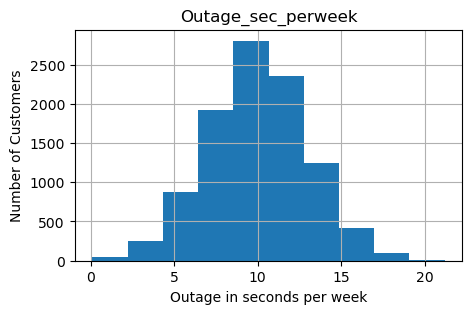

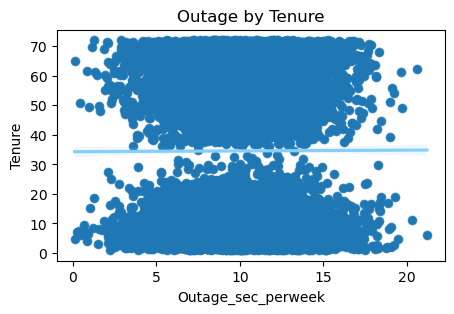

In [58]:
#Plotting the univarite distribution of Outage and then plotting the bivariate distribution against Tenure
df.hist(column=["Outage_sec_perweek"], figsize=(5,3))
plt.xlabel("Outage in seconds per week")
plt.ylabel("Number of Customers")

df.plot.scatter(x="Outage_sec_perweek",y="Tenure",title="Outage by Tenure", figsize=(5,3))
sns.regplot(data=df, x="Outage_sec_perweek", y="Tenure", scatter_kws={"color": "tab:blue"}, line_kws={"color": "lightskyblue"})

<Axes: title={'center': 'Number of Emails by Tenure'}, xlabel='Email', ylabel='Tenure'>

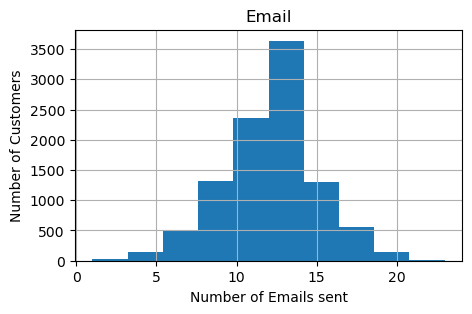

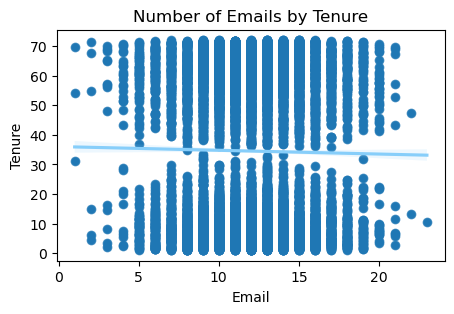

In [59]:
#Plotting the univarite distribution of Emails and then plotting the bivariate distribution against Tenure
df.hist(column=["Email"], figsize=(5,3))
plt.xlabel("Number of Emails sent")
plt.ylabel("Number of Customers")

df.plot.scatter(x="Email",y="Tenure",title="Number of Emails by Tenure", figsize=(5,3))
sns.regplot(data=df, x="Email", y="Tenure", scatter_kws={"color": "tab:blue"}, line_kws={"color": "lightskyblue"})

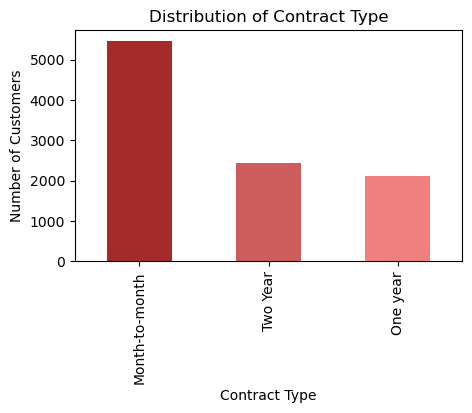

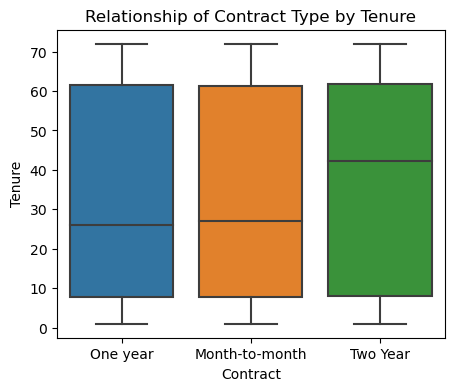

In [60]:
#Plotting the univarite distribution of Contract Type and then plotting the bivariate distribution against Tenure
df["Contract"].value_counts().plot(
    kind="bar", title="Distribution of Contract Type", ylabel="Number of Customers",
    xlabel="Contract Type", figsize=(5,3), color=['brown','indianred','lightcoral'])
plt.show()

plt.figure(figsize=(5,4))
sns.boxplot(data=df, x="Contract", y="Tenure")
plt.xlabel("Contract")
plt.ylabel("Tenure")
plt.title("Relationship of Contract Type by Tenure")
plt.show()

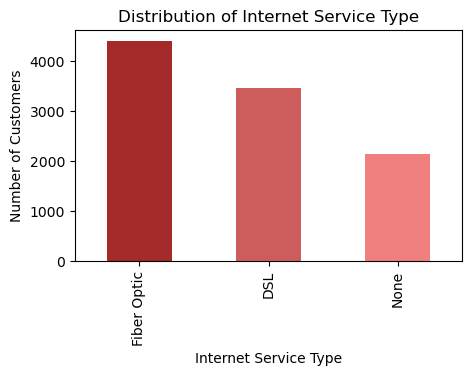

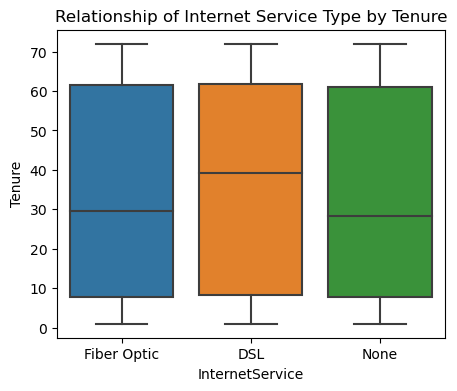

In [61]:
#Plotting the univarite distribution of Internet Service Type and then plotting the bivariate distribution against Tenure
df["InternetService"].value_counts().plot(
    kind="bar", title="Distribution of Internet Service Type", ylabel="Number of Customers",
    xlabel="Internet Service Type", figsize=(5,3), color=['brown','indianred','lightcoral'])
plt.show()

plt.figure(figsize=(5,4))
sns.boxplot(data=df, x="InternetService", y="Tenure")
plt.xlabel("InternetService")
plt.ylabel("Tenure")
plt.title("Relationship of Internet Service Type by Tenure")
plt.show()

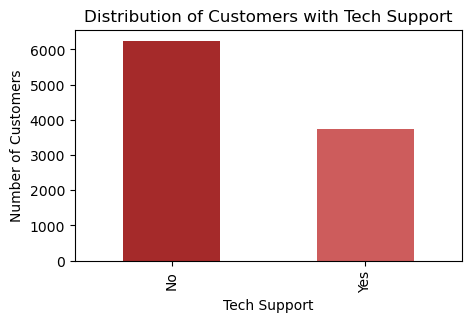

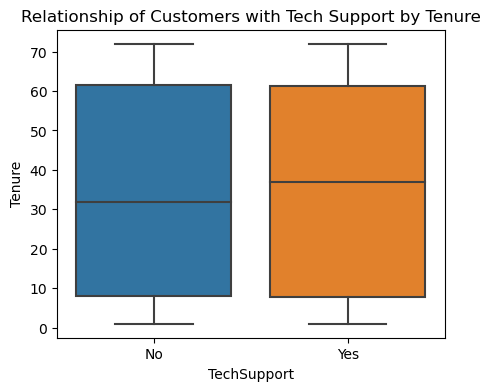

In [62]:
#Plotting the univarite distribution of Customers with Tech Support and then plotting the bivariate distribution against Tenure
df["TechSupport"].value_counts().plot(
    kind="bar", title="Distribution of Customers with Tech Support", ylabel="Number of Customers",
    xlabel="Tech Support", figsize=(5,3), color=['brown','indianred','lightcoral'])
plt.show()

plt.figure(figsize=(5,4))
sns.boxplot(data=df, x="TechSupport", y="Tenure")
plt.xlabel("TechSupport")
plt.ylabel("Tenure")
plt.title("Relationship of Customers with Tech Support by Tenure")
plt.show()

<Axes: title={'center': 'Monthly Charge by Tenure'}, xlabel='MonthlyCharge', ylabel='Tenure'>

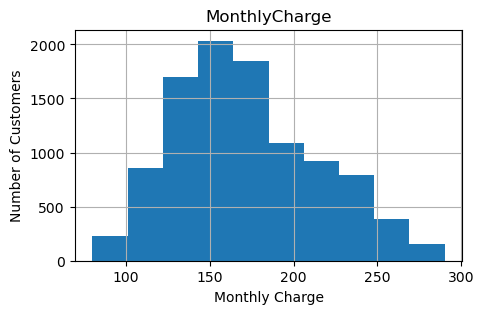

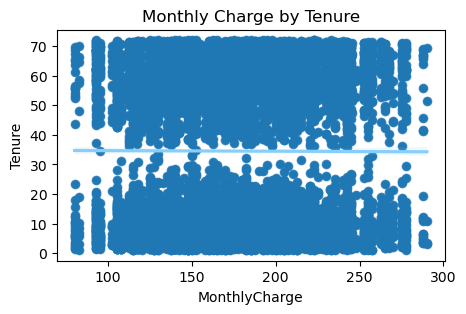

In [63]:
#Plotting the univarite distribution of Monthly Charges and then plotting the bivariate distribution against Tenure
df.hist(column=["MonthlyCharge"], figsize=(5,3))
plt.xlabel("Monthly Charge")
plt.ylabel("Number of Customers")

df.plot.scatter(x="MonthlyCharge",y="Tenure",title="Monthly Charge by Tenure", figsize=(5,3))
sns.regplot(data=df, x="MonthlyCharge", y="Tenure", scatter_kws={"color": "tab:blue"}, line_kws={"color": "lightskyblue"})

<Axes: title={'center': 'Annual Bandwidth Usage by Tenure'}, xlabel='Bandwidth_GB_Year', ylabel='Tenure'>

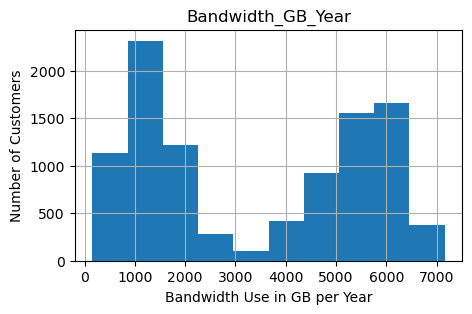

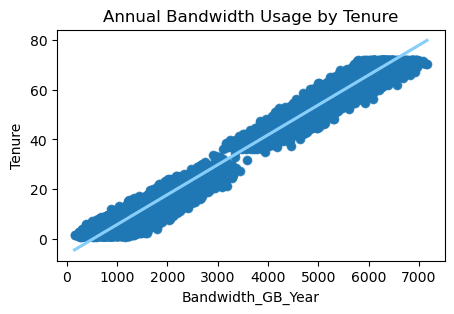

In [64]:
#Plotting the univarite distribution of Annual Bandwidth Usage and then plotting the bivariate distribution against Tenure
df.hist(column=["Bandwidth_GB_Year"], figsize=(5,3))
plt.xlabel("Bandwidth Use in GB per Year")
plt.ylabel("Number of Customers")

df.plot.scatter(x="Bandwidth_GB_Year",y="Tenure",title="Annual Bandwidth Usage by Tenure", figsize=(5,3))
sns.regplot(data=df, x="Bandwidth_GB_Year", y="Tenure", scatter_kws={"color": "tab:blue"}, line_kws={"color": "lightskyblue"})

### C4: Data Transformation
As mentioned above, I will need to re-express binary categorical variables to 1 and 0 to indicate "Yes" or "No" status. Additionally, the categorical variables that have more that just "Yes" and "No" binary responses will need to be re-expressed using one hot encoding. Essentially, this process creates dummy variables to store a binary indicator for each data entry. For example, looking at Internet Service Type, if a customer has Fiber Optic service, the Fiber Optic dummy variable would contain a "1" while the DSL and No Service variables would contain "0" to indicate that this customer has Fiber Optic. Code for creating dummy variables learned from Youtube video series on multiple linear regression (Keith, 2021).

When using one hot encoding I must ensure not to include all the dummy variables within my resulting dataframe, as keeping all of the dummy variables will result in multicollinearity. Therefore, going with the Internet Service example I will drop the first of the three dummy variables to my new dataframe, but even if I am missing the DSL column, having a "0" in both Fiber Optic and No Service will indicate that the customer has DSL so it also reduces redundancy in my dataframe.

Finally, I will store only the relevant variables being used for my multiple linear regression model and then export said dataframe into a csv file. As any continuous variables require no imputation or transformation, I can simply just create a new dataframe and input those variables first.

In [65]:
#creating new dataframe for MLR using only dependant variable and independant variables
MLR_df = df[["Tenure", "Children", "Age", "Income", "Gender", "Outage_sec_perweek", "Email", "Contract", "InternetService", 
             "MonthlyCharge", "Bandwidth_GB_Year"]]

#Re-expressing all binary responses to ordinal encoding and adding it to the end of my MLR dataframe
MLR_df.insert(7, "TechSupport", df["TechSupport"].replace({"Yes": 1, "No": 0}))

#Performing one-hot encoding on the categorical variables with 3 or more selections and dropping the 
#first dummies to prevent perfect multicollinearity (Keith, 2021)
MLR_df = pd.get_dummies(MLR_df, columns=["Gender", "Contract", "InternetService"], drop_first=True)

#Printing my MLR dataframe to check if it was constructed correctly
MLR_df.head()

,Tenure,Children,Age,Income,Outage_sec_perweek,Email,TechSupport,MonthlyCharge,Bandwidth_GB_Year,Gender_Male,Gender_Nonbinary,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_None
CaseOrder,,,,,,,,,,,,,,,
1,6.795513,0,68,28561.99,7.978323,10,0,172.455519,904.536110,1,0,1,0,1,0
2,1.156681,1,27,21704.77,11.699080,12,0,242.632554,800.982766,0,0,0,0,1,0
3,15.754144,4,50,9609.57,10.752800,9,0,159.947583,2054.706961,0,0,0,1,0,0
4,17.087227,1,48,18925.23,14.913540,15,0,119.956840,2164.579412,1,0,0,1,0,0
5,1.670972,0,83,40074.19,8.147417,16,1,149.948316,271.493436,1,0,0,0,1,0


In [66]:
#checking to see if any null values were created in the transformation process
MLR_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       10000 non-null  float64
 1   Children                     10000 non-null  int64  
 2   Age                          10000 non-null  int64  
 3   Income                       10000 non-null  float64
 4   Outage_sec_perweek           10000 non-null  float64
 5   Email                        10000 non-null  int64  
 6   TechSupport                  10000 non-null  int64  
 7   MonthlyCharge                10000 non-null  float64
 8   Bandwidth_GB_Year            10000 non-null  float64
 9   Gender_Male                  10000 non-null  uint8  
 10  Gender_Nonbinary             10000 non-null  uint8  
 11  Contract_One year            10000 non-null  uint8  
 12  Contract_Two Year            10000 non-null  uint8  
 13  InternetService_

### C5: Prepared Dataset
Below is the code I have used to export my cleaned and transformed dataset containing only the variables needed to conduct my multiple linear regression analysis, omitting the index column that was originally imported. This csv file will be submitted alongside my Jupiter notebook.

In [67]:
#exporting dataset to csv file, additional optional transformation performed below, code can be found in section D2
MLR_df.to_csv('mlr_dataset.csv', index=False)

### D1: Initial MLR

In [68]:
#Creating multiple linear regression model, 
#code learned from a tutorial series on multiple linear regression (Keith, 2021).
model = sm.OLS(MLR_df["Tenure"], MLR_df.drop(columns=["Tenure"]).assign(const=1))
m_result = model.fit()
print(m_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.063e+06
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:28:24   Log-Likelihood:                -10403.
No. Observations:               10000   AIC:                         2.084e+04
Df Residuals:                    9985   BIC:                         2.094e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children          

In [69]:
#Calculating residual standard error of initial model
m_resid = m_result.resid
rstd = np.std(m_resid)
print("Initial model's residual standard error is " + str(rstd))

Initial model's residual standard error is 0.6847841502751112


The MLR model has indicated that an R-Squared value of 0.999, meaning that the independant variables contained within my model can account for 99% of the variance within my dependant variable. This is a great start, however the model also indicates that there could be strong multicollinearity issues between the independant variables used. As one of the major assumptions of the MLR model is that no multicollinearity can exist, some variables have to be dropped from my model to resolve this issue.

### D2: Jusitification of Reduction
For my MLR model, I have chosen to utilize the Variance Inflation Factors (VIF) of my independant variables in assessing multicollinearity between my independant variables. VIF values over 5 demonstrate moderate correlation between my independant variables, while 10 indicate a strong correlation. As such, I will drop any independant variables with a VIF over 5 from my model. This will be done iterating through my analysis, dropping the highest VIF, then running the analysis, repeating until there are no variables with a VIF above 5 (Keith, 2021).

In [70]:
#Conducting VIF analysis with all variables except the dependant variable (Keith, 2021)
X = MLR_df.drop(columns=["Tenure"])

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
vif_df

,feature,VIF
0,Children,1.919084
1,Age,6.731009
2,Income,2.880267
3,Outage_sec_perweek,10.112612
4,Email,12.339369
5,TechSupport,1.631493
6,MonthlyCharge,14.756313
7,Bandwidth_GB_Year,3.347055
8,Gender_Male,1.921288
9,Gender_Nonbinary,1.044320


In [71]:
#Conducting VIF analysis after dropping the Monthly Charge variable
X = MLR_df.drop(columns=["Tenure", "MonthlyCharge"])

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
vif_df

,feature,VIF
0,Children,1.912292
1,Age,6.420760
2,Income,2.843040
3,Outage_sec_perweek,9.244773
4,Email,10.925571
5,TechSupport,1.584792
6,Bandwidth_GB_Year,3.219967
7,Gender_Male,1.908925
8,Gender_Nonbinary,1.043246
9,Contract_One year,1.367542


In [72]:
#Conducting VIF analysis after dropping the Email variable
X = MLR_df.drop(columns=["Tenure", "MonthlyCharge", "Email"])

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
vif_df

,feature,VIF
0,Children,1.889483
1,Age,5.787675
2,Income,2.771199
3,Outage_sec_perweek,7.555393
4,TechSupport,1.566659
5,Bandwidth_GB_Year,3.117887
6,Gender_Male,1.882022
7,Gender_Nonbinary,1.042092
8,Contract_One year,1.360827
9,Contract_Two Year,1.426883


In [73]:
#Conducting VIF analysis after dropping the Outage variable
X = MLR_df.drop(columns=["Tenure", "MonthlyCharge", "Email", "Outage_sec_perweek"])

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
vif_df

,feature,VIF
0,Children,1.850572
1,Age,4.711111
2,Income,2.644752
3,TechSupport,1.549891
4,Bandwidth_GB_Year,2.897041
5,Gender_Male,1.833901
6,Gender_Nonbinary,1.039319
7,Contract_One year,1.345354
8,Contract_Two Year,1.407060
9,InternetService_Fiber Optic,2.016342


Following the VIF analysis, no independant variables demonstrate a moderate correlation or higher. Now the MLR model can be run again to identify any changes. But first, it would be better to transform my data. As it currently stands, all the continuous variables being used display a wide range of values that cannot be compared on a level field, number of children ranging from 1-10 cannot be weighed against bandwidth ranging from 155-7000+. Therefore, I would like to normalize my values, re-expressing them based on their minimums and maximums, so that each column will only have values ranging from 0-1. Code sourced from tutorial series on MLR models (Keith, 2021).

In [74]:
#normalizing variables within MLR dataframe based upon minimum and maximum values, reducing maximum ranges to 0-1
MLR_df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(MLR_df), columns=MLR_df.columns)
MLR_df_minmax.head()

,Tenure,Children,Age,Income,Outage_sec_perweek,Email,TechSupport,MonthlyCharge,Bandwidth_GB_Year,Gender_Male,Gender_Nonbinary,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_None
0,0.081624,0.0,0.704225,0.109120,0.373260,0.409091,0.0,0.439985,0.106951,1.0,0.0,1.0,0.0,1.0,0.0
1,0.002203,0.1,0.126761,0.082599,0.549537,0.500000,0.0,0.773872,0.092165,0.0,0.0,0.0,0.0,1.0,0.0
2,0.207804,0.4,0.450704,0.035818,0.504705,0.363636,0.0,0.380474,0.271180,0.0,0.0,0.0,1.0,0.0,0.0
3,0.226580,0.1,0.422535,0.071848,0.701827,0.636364,0.0,0.190207,0.286868,1.0,0.0,0.0,1.0,0.0,0.0
4,0.009447,0.0,0.915493,0.153646,0.381271,0.681818,1.0,0.332900,0.016561,1.0,0.0,0.0,0.0,1.0,0.0


In [75]:
#I was not certain if the assignment required a submission of the dataset being used for the initial model or the scaled data,
#I decided to include both
MLR_df_minmax.to_csv('scaled_mlr_dataset.csv', index=False)

In [76]:
#Creating multiple linear regression model after dropping variables from the VIF analysis, using scaled data
model = sm.OLS(MLR_df_minmax["Tenure"], 
               MLR_df_minmax.drop(columns=["Tenure", "MonthlyCharge", "Email", "Outage_sec_perweek"]).assign(const=1))
m_result = model.fit()
print(m_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.355e+05
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:33:51   Log-Likelihood:                 20748.
No. Observations:               10000   AIC:                        -4.147e+04
Df Residuals:                    9988   BIC:                        -4.139e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children          

As can be seen above, the MLR model is no longer indicating multicollinearity. Now, to isolate independant variables that are relevant to my initial question, I will need to drop any variable with a P-value greater than 0.05, as those above this value do not demonstrate correlation that is statistically significant to my Dependant variable. 

This will be done through Backward Stepwise Elimination. Much like my VIF analysis, I will generate a multiple linear regression model, identify the independant variable with the highest p-value above 0.05, and run my MLR model again, without said variable. This will be conducted until all the variables within my model will have a p-value below 0.05 (Tripathi, 2019). By the end, I will ideally have a reduced model with independant variables that demonstrate a significant correlation with Tenure.

In [77]:
#Creating multiple linear regression model after dropping the Tech Support column
model = sm.OLS(MLR_df_minmax["Tenure"], 
               MLR_df_minmax.drop(columns=["Tenure", "MonthlyCharge", "Email", "Outage_sec_perweek",
                                          "TechSupport"]).assign(const=1))
m_result = model.fit()
print(m_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.491e+05
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:35:40   Log-Likelihood:                 20748.
No. Observations:               10000   AIC:                        -4.147e+04
Df Residuals:                    9989   BIC:                        -4.140e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children          

In [78]:
#Creating multiple linear regression model after dropping the Income column
model = sm.OLS(MLR_df_minmax["Tenure"], 
               MLR_df_minmax.drop(columns=["Tenure", "MonthlyCharge", "Email", "Outage_sec_perweek",
                                          "TechSupport", "Income"]).assign(const=1))
m_result = model.fit()
print(m_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.656e+05
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:35:51   Log-Likelihood:                 20748.
No. Observations:               10000   AIC:                        -4.148e+04
Df Residuals:                    9990   BIC:                        -4.140e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children          

In [79]:
#Creating multiple linear regression model after dropping the Two Year Contract column
model = sm.OLS(MLR_df_minmax["Tenure"], 
               MLR_df_minmax.drop(columns=["Tenure", "MonthlyCharge", "Email", "Outage_sec_perweek",
                                          "TechSupport", "Income", "Contract_Two Year"]).assign(const=1))
m_result = model.fit()
print(m_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.863e+05
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:36:02   Log-Likelihood:                 20748.
No. Observations:               10000   AIC:                        -4.148e+04
Df Residuals:                    9991   BIC:                        -4.141e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children          

In [80]:
#Creating multiple linear regression model after dropping the Nonbinary column
model = sm.OLS(MLR_df_minmax["Tenure"], 
               MLR_df_minmax.drop(columns=["Tenure", "MonthlyCharge", "Email", "Outage_sec_perweek",
                                          "TechSupport", "Income", "Contract_Two Year", "Gender_Nonbinary"]).assign(const=1))
m_result = model.fit()
print(m_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.130e+05
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:36:18   Log-Likelihood:                 20747.
No. Observations:               10000   AIC:                        -4.148e+04
Df Residuals:                    9992   BIC:                        -4.142e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children          

### D3: Reduced Linear Regression Model
Initial MLR model can be found in D1. My statistically based feature selection process was conducted above through first working backwards in eliminating the highest variance inflation factor above 5 to tackle any issues presented within my initial MLR model indicating multicollinearity. Once the multicollinearity issues were resolved it was necessary to utilize a backwards stepwise process to isolate the independant variables that demonstrated statistical significance in the effect on my dependant variable, that being only features with a p-value less than 0.05.

Following my feature selection process, my reduced multiple linear regression model indicates 6 independant variables that demonstrate a statistical significance in the change in customer Tenure:
- Number of Children
- Customer Age
- Annual Bandwidth Usage
- Whether or not the Customer is Male
- Whether or not the Customer has Fiber Optic Service
- Whether or not the Customer has No Internet Service

These independant variables, in conjunction with my model's R-Squared value of 0.993 indicate that the data selected for my MLR can explain 99% of the variance observed in my dependant variable. The final reduced model can be found below, alongside a lower standard error than my initial model, indicating a tighter spread of residuals within my data.

In [81]:
#Creating final reduced multiple linear regression model after dropping the One Year Contract column
#in addition to the other rejected variables.
reduced_model = sm.OLS(MLR_df_minmax["Tenure"], 
               MLR_df_minmax.drop(columns=["Tenure", "MonthlyCharge", "Email", "Outage_sec_perweek",
                                          "TechSupport", "Income", "Contract_Two Year", "Gender_Nonbinary",
                                          "Contract_One year"]).assign(const=1))
reduced_result = reduced_model.fit()
print(reduced_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.484e+05
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:36:42   Log-Likelihood:                 20745.
No. Observations:               10000   AIC:                        -4.148e+04
Df Residuals:                    9993   BIC:                        -4.143e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children          

In [82]:
#Calculating residual standard error of the reduced model updated with unique variables to prevent errors
reduced_resid = reduced_result.resid
reduced_rstd = np.std(reduced_resid)
print("Reduced model's residual standard error is " + str(reduced_rstd))

Reduced model's residual standard error is 0.030394940516110906


### E1: Model Comparison
When comparing my initial model to my reduced model, several variables unrelated to the influence on customer Tenure have been removed. In addition to the three variables removed during my VIF analysis (Monthly charge, email, and outage time), my backwards stepwise p-value analysis resulted in an additional removal of 5 independant variables in arriving at my final MLR model. As can be seen between the two, unlike the initial MLR model, my reduced model demonstrates no potential errors for multicollinearity, and all the variables remaining are statistically significant (p-value less than 0.05).

Going further, the R-Squared value is a metric for determining how much of the variance within my dependant variable can be explained through my independant variables. It is noted that the r-squared value does not fluctuate between the two models, thus both models are techincally valid in that they can both explain roughly 99% of the variance in Tenure through the predictor variables chosen. As such, the r-squared value is not an efficient metric for determining the improvement between models.

For this, I will instead turn to the residual standard error. The residual is a measurement of variance that any given variable may have from the line of best fit. In assessing the standard error's magnitude, a smaller number indicates a tigher spread from the projected placement of data points, leading to more accurate models and better projections. In D1 the initial MLR model had a residual standard error of about 0.68. Following my feature selection analysis, my reduced MLR model carries a residual standard error of about 0.03, inidicating that my final model is an improvement and can make more accurate predictions than the initial one.

### E2: Residual Plots
I have conducted and performed all the calculations for this segment above, within section D. Residual plots are modelled below using seaborn's residplot function, using the data from the final reduced MLR model in D3.

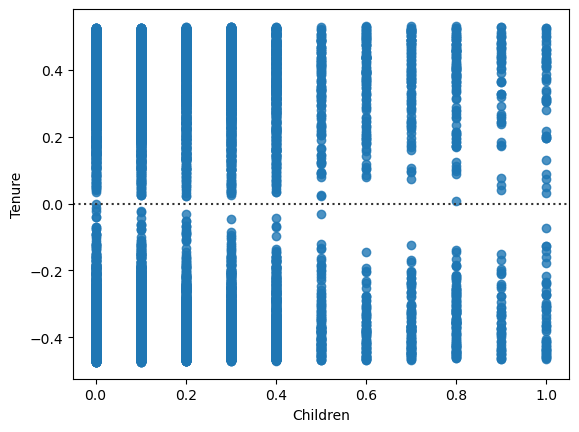

In [83]:
#plotting the residuals of Children from my dataset
sns.residplot(x='Children', y='Tenure', data=MLR_df_minmax)
plt.show()

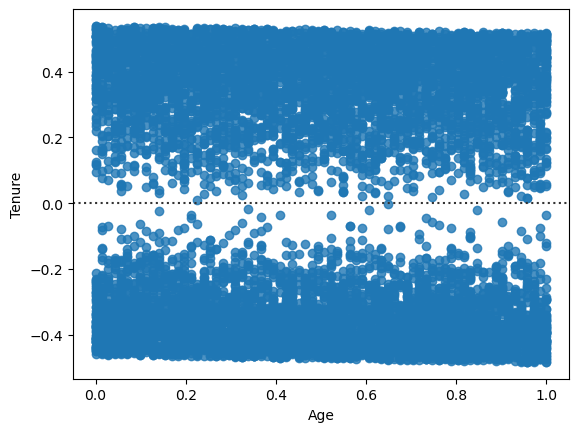

In [84]:
#plotting the residuals of Age from my dataset
sns.residplot(x='Age', y='Tenure', data=MLR_df_minmax)
plt.show()

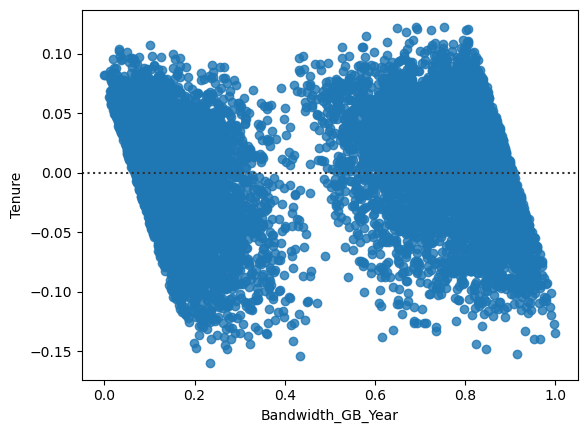

In [85]:
#plotting the residuals of Bandwidth Usage from my dataset
sns.residplot(x='Bandwidth_GB_Year', y='Tenure', data=MLR_df_minmax)
plt.show()

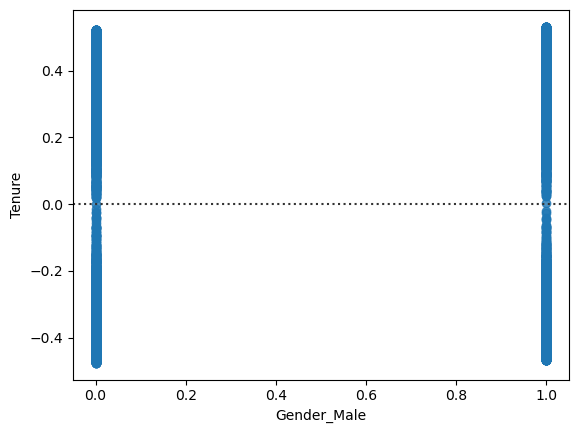

In [86]:
#plotting the residuals of Male customers from my dataset
sns.residplot(x='Gender_Male', y='Tenure', data=MLR_df_minmax)
plt.show()

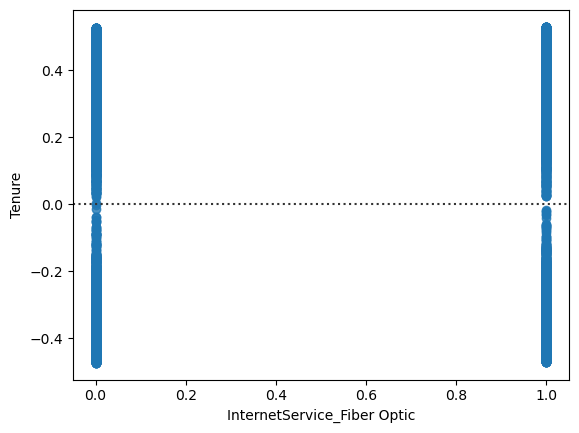

In [87]:
#plotting the residuals of customers with Fiber Optic from my dataset
sns.residplot(x='InternetService_Fiber Optic', y='Tenure', data=MLR_df_minmax)
plt.show()

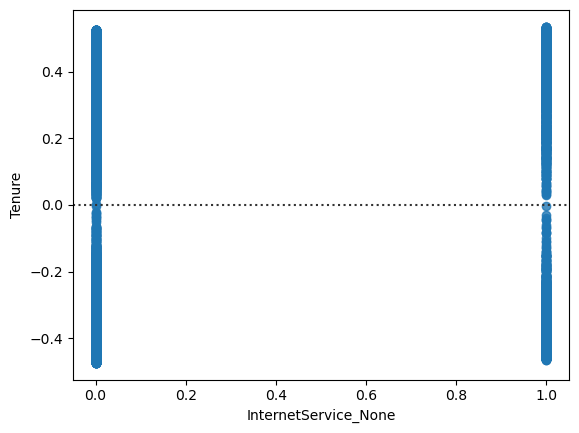

In [88]:
#plotting the residuals of customers with no internet service from my dataset
sns.residplot(x='InternetService_None', y='Tenure', data=MLR_df_minmax)
plt.show()

In reviewing the plots above, we can see that the residuals demonstrate some heteroscedasticity within my first three plots, as the residuals do not display consistent distribution around 0, this trend is less apparent within the residual plots for binary variables. Overall, the residuals are not entirely heteroscedastic but this does no longer satisfy one of my assumptions regarding multiple linear regression. Furthermore, this distribution may indicate some skew within my model.

Additionally, a re-print of the reduced model's residual standard error can be found below, updated with unique variables to prevent errors.

In [89]:
#Calculating residual standard error of the reduced model
reduced_resid = reduced_result.resid
reduced_rstd = np.std(reduced_resid)
print("Reduced model's residual standard error is " + str(reduced_rstd))

Reduced model's residual standard error is 0.030394940516110906


### E3: Code
Code used to create linear regression models and determine residual standard error can be found above within sections D1-D3. Code to construct residual plots can be found in section E2.

### F1: Results
**Regression Equation/Interpretation**

My reduced model results in the following regression equation:

#### Ŷ = -0.1294 - 0.0521(Children) + 0.0390(Age) +1.1962(Bandwidth) - 0.0125(Male) + 0.0706(Fiber Optic) + 0.0712(Service_None)

To elaborate on the above, keeping all things constant:
- Per 1 increase in children, tenure decreases by 0.0521 months
- Per 1 age increase, tenure increases by 0.0390 months
- Per 1 GB in bandwidth usage per year, tenure increases by 1.1962 months
- Customers who are male have a 1.25% lower tenure
- Customers who have fiber optic service have a 7.06% higher tenure
- Customers who do not have any internet service have a 7.12% higher tenure

**Statistical/Practical Significance**

From a statistical standpoint, the analysis performed for my final model in D3 demonstrates that the p-value of the model's f-statistic is 0.00. As this value is less than 0.05, the model presented demonstrates statistical significance in the relationship between the independant variables and tenure. Not all the assumptions of multiple linear regression have not been ideally met (such as a lack of perfect homoscedasticity), which may reduce the full accuracy of the model created, but overall I believe this to be a strong model based on the variables chosen, as the data retrieved from my OLS model above demonstrate statistical significance. 

Conversely, the model does not demonstrate much practical significance due to some variable relationships being counter-intuitive. I could see this regression equation being a metric for telecommunication companies to target advertising effectively. For example; customers who have fiber optic service are likely to have longer tenures, therefore the company could strongly advertise the fiber optic service package to encourage longer tenures. However, doing so neglects that customers who do not have *any* internet service package also influence longer tenures, making it impossible to cater to both variables.

**Limitations**

The dataset provided is limited in scope, I do not believe that a population 10,000 customers is enough entries to really develop a strong meaningful relationship between the variables. Some of the data points seem quite unlikely as well, such as 18 year old customers that have 10 children. While it is technically not impossible for this to occur, the data provided suggests that there is not really any restriction on what information is inputted by the customer, such as input errors that can cause skew within predictive modelling. 

### F2: Recommendations
In terms of the regression equation, there is one variable that should be focused on that does not interfere with any others within my model: Bandwidth. As increases in bandwidth usage indicate a strong increase in tenure, the company could strongly focus targeted marketing campaigns on large scale downloading capabilities, or high quality streaming options to encourage customers to utilize more bandwidth. In doing so, customers will be inclined to utilize their service plans to their highest extent, promoting stronger customer retention in the long run.

### G: Panopto
My panopto video can be found here: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=f26641a4-58ff-4249-a449-b15900363213

### H: Code Sources
Mark Keith. (2021, October 11). *MLR / OLS in Python Google Colab*. \[Playlist]. Youtube. https://www.youtube.com/playlist?list=PLe9UEU4oeAuXcYlG8Bs9uzceeXikeiurD

### I: Sources
Tripathi, A. (2019, July 17). *Feature selection techniques in regression model*. Medium. 
https://towardsdatascience.com/feature-selection-techniques-in-regression-model-26878fe0e24e 